In [31]:
# --- 1. Importación de librerías ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [32]:
# --- 2. Carga de datos ---
df = pd.read_csv('Pokemon.csv')
print("Columnas del dataset:")
print(df.columns)


Columnas del dataset:
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [33]:
# --- 3. Selección de estadísticas relevantes ---
stats_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
df_stats = df[stats_cols]


In [34]:
# --- 4. Normalización de datos ---
scaler = StandardScaler()
scaled_stats = scaler.fit_transform(df_stats)


In [35]:
# --- 5. Aplicación de K-Means ---
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_stats)

In [36]:
# --- 6. Reducción de dimensionalidad con PCA ---
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_stats)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

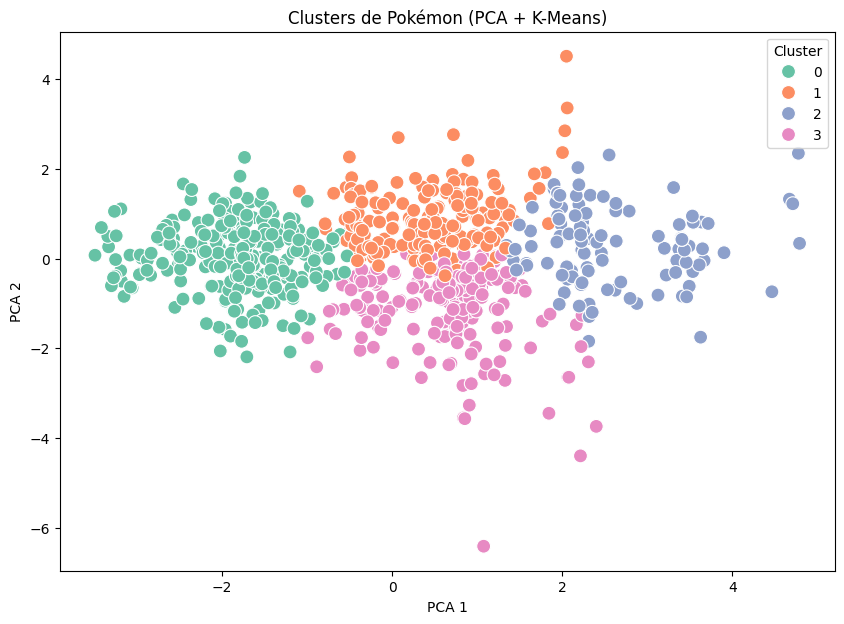

In [37]:
# --- 7. Visualización 2D de clusters ---
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title("Clusters de Pokémon (PCA + K-Means)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.show()

In [38]:
# --- 8. Análisis estadístico por cluster ---
cluster_summary = df.groupby('Cluster')[stats_cols].mean().round(1)
print("Resumen estadístico por cluster:")
print(cluster_summary)

Resumen estadístico por cluster:
           HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
Cluster                                                
0        50.1    54.0     51.9     48.1     49.2   49.5
1        69.3    84.3     65.9     83.5     73.0   94.6
2        94.3   114.0     94.6    117.7    103.7   95.5
3        81.9    88.9    101.0     71.3     84.6   52.7


In [39]:
# --- 9. Asignar nombres creativos a los clusters ---
cluster_names = {
    0: 'Tanques Estratégicos',
    1: 'Cañones de Cristal',
    2: 'Equilibrados',
    3: 'Velocistas Frágiles'
}
df['ClusterName'] = df['Cluster'].map(cluster_names)

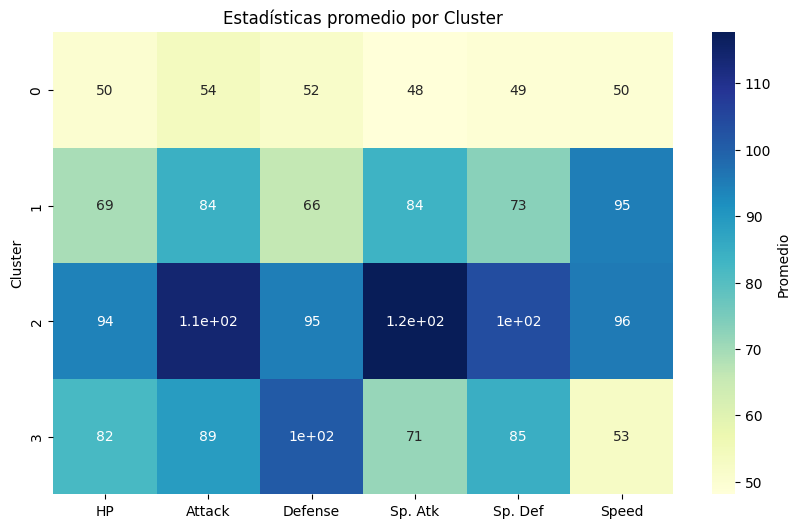

In [40]:
# --- 10. Heatmap comparativo de stats ---
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Promedio'})
plt.title("Estadísticas promedio por Cluster")
plt.show()

In [41]:
# --- 11. Análisis detallado de cada cluster ---
for i, row in cluster_summary.iterrows():
    print(f"\nCluster {i} - {cluster_names[i]}")
    print(row.sort_values(ascending=False))


Cluster 0 - Tanques Estratégicos
Attack     54.0
Defense    51.9
HP         50.1
Speed      49.5
Sp. Def    49.2
Sp. Atk    48.1
Name: 0, dtype: float64

Cluster 1 - Cañones de Cristal
Speed      94.6
Attack     84.3
Sp. Atk    83.5
Sp. Def    73.0
HP         69.3
Defense    65.9
Name: 1, dtype: float64

Cluster 2 - Equilibrados
Sp. Atk    117.7
Attack     114.0
Sp. Def    103.7
Speed       95.5
Defense     94.6
HP          94.3
Name: 2, dtype: float64

Cluster 3 - Velocistas Frágiles
Defense    101.0
Attack      88.9
Sp. Def     84.6
HP          81.9
Sp. Atk     71.3
Speed       52.7
Name: 3, dtype: float64


<Figure size 1200x600 with 0 Axes>

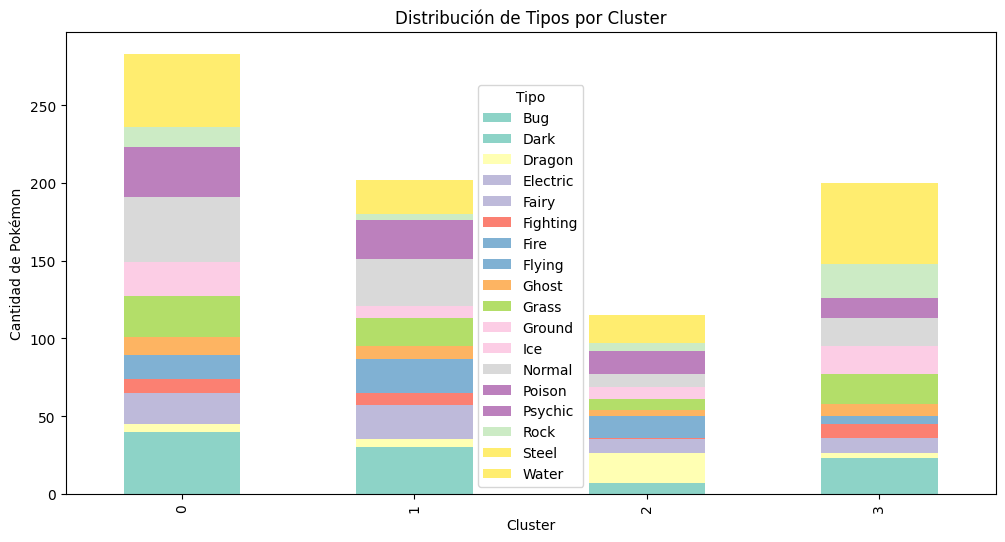

In [42]:
# --- 12. Visualización adicional: distribución de tipos por cluster ---
plt.figure(figsize=(12, 6))
cluster_types = df.groupby('Cluster')['Type 1'].value_counts().unstack().fillna(0)
cluster_types.plot(kind='bar', stacked=True, colormap='Set3', figsize=(12, 6))
plt.title("Distribución de Tipos por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de Pokémon")
plt.legend(title='Tipo')
plt.show()

In [43]:
# --- 13. ¿Dónde están los Pokémon legendarios? ---
legendary_distribution = df.groupby(['Cluster', 'Legendary']).size().unstack(fill_value=0)
print("\nDistribución de Pokémon legendarios por cluster:")
print(legendary_distribution)


Distribución de Pokémon legendarios por cluster:
Legendary  False  True 
Cluster                
0            283      0
1            199      3
2             57     58
3            196      4


## Cluster Creativo 1: Pokémon con ADN de Jefe Final

Este cluster identifica Pokémon con estadísticas muy altas en HP, Attack, Defense o Sp. Atk, pero con Speed baja. Corresponden al perfil de jefes finales o guardianes poderosos que podrían ser usados en videojuegos o mercancías premium.


In [44]:
# --- 14. Cluster personalizado: Pokémon con ADN de Jefe Final ---

# Definimos umbrales para ser considerado "jefe final"
# Alto en HP, Attack, Defense o Sp. Atk (top 25%)
# Bajo en Speed (bottom 25%)
high_threshold = df[stats_cols].quantile(0.75)
low_speed_threshold = df['Speed'].quantile(0.25)

# Condición compuesta
jefes_df = df[
    ((df['HP'] >= high_threshold['HP']) |
     (df['Attack'] >= high_threshold['Attack']) |
     (df['Defense'] >= high_threshold['Defense']) |
     (df['Sp. Atk'] >= high_threshold['Sp. Atk'])) &
    (df['Speed'] <= low_speed_threshold)
].copy()

# Nombre del cluster
jefes_df['CustomCluster'] = 'ADN de Jefe Final'


In [ ]:
print(f"\nPokémon con ADN de Jefe Final ({len(jefes_df)} encontrados):")
print(jefes_df[['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Speed']].sort_values(by='HP', ascending=False))



🛡️ Pokémon con ADN de Jefe Final (92 encontrados):
           Name   HP  Attack  Defense  Sp. Atk  Speed
217   Wobbuffet  190      33       58       33     33
155     Snorlax  160     110       65       65     30
45   Wigglytuff  140      70       45       85     45
495    Munchlax  135      85       40       40      5
598       Throh  120     100       85       30     45
..          ...  ...     ...      ...      ...    ...
97     Shellder   30      65      100       45     40
455    Shieldon   30      42      118       42     30
88    Magnemite   25      35       70       95     45
388     Duskull   20      40       90       30     25
230     Shuckle   20      10      230       10      5

[92 rows x 6 columns]


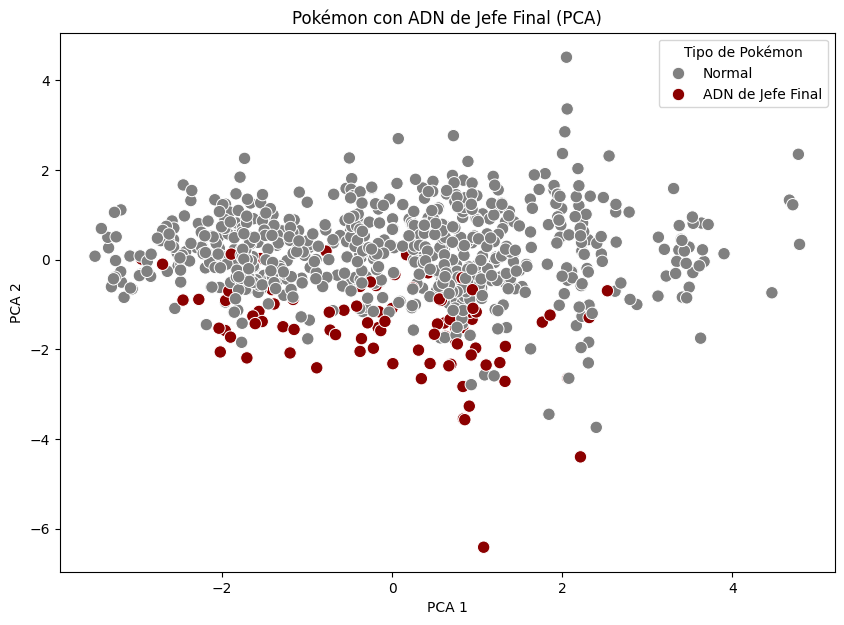

In [46]:
df['CustomCluster'] = 'Normal'
df.loc[jefes_df.index, 'CustomCluster'] = 'ADN de Jefe Final'

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='CustomCluster', palette={'Normal': 'gray', 'ADN de Jefe Final': 'darkred'}, s=80)
plt.title("Pokémon con ADN de Jefe Final (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Tipo de Pokémon')
plt.show()


In [ ]:
print("\nEstadísticas promedio del cluster 'ADN de Jefe Final':")
print(jefes_df[stats_cols].mean().round(1))



📊 Estadísticas promedio del cluster 'ADN de Jefe Final':
HP         75.0
Attack     78.7
Defense    99.2
Sp. Atk    65.4
Sp. Def    75.2
Speed      31.7
dtype: float64


## Cluster Creativo 2: Pokémon con Perfil de Estrella Cinematográfica

Este cluster identifica Pokémon no legendarios que, por sus **altos stats totales** y **tipos visualmente llamativos** (`Fire`, `Electric`, `Dragon`, etc.), tienen el potencial de protagonizar películas, campañas publicitarias o videojuegos propios.

Se destacan por su potencia general y atractivo visual, lo que los hace perfectos para **mercancía de alto impacto** y roles de protagonista en franquicias.


In [48]:
# --- 15. Cluster personalizado: Pokémon con perfil de Estrella Cinematográfica ---

# Calcular total de estadísticas base
df['TotalStats'] = df[stats_cols].sum(axis=1)

# Umbral alto de stats totales (percentil 85)
total_threshold = df['TotalStats'].quantile(0.85)

# Tipos visualmente llamativos
tipos_cine = ['Fire', 'Electric', 'Dragon', 'Psychic', 'Dark', 'Fighting']

# Filtrar Pokémon con alto total de stats, no legendarios, tipo llamativo
cine_df = df[
    (df['TotalStats'] >= total_threshold) &
    (df['Legendary'] == False) &
    (df['Type 1'].isin(tipos_cine))
].copy()

# Asignar nombre al cluster
cine_df['CustomCluster'] = 'Estrella Cinematográfica'


In [ ]:
print(f"\nPokémon con perfil de Estrella Cinematográfica ({len(cine_df)} encontrados):")
print(cine_df[['Name', 'Type 1', 'TotalStats'] + stats_cols].sort_values(by='TotalStats', ascending=False))



🎬 Pokémon con perfil de Estrella Cinematográfica (24 encontrados):
                          Name    Type 1  TotalStats   HP  Attack  Defense  \
409    SalamenceMega Salamence    Dragon         700   95     145      130   
494      GarchompMega Garchomp    Dragon         700  108     170      115   
7    CharizardMega Charizard X      Fire         634   78     130      111   
8    CharizardMega Charizard Y      Fire         634   78     104       78   
279      BlazikenMega Blaziken      Fire         630   80     160       80   
498        LucarioMega Lucario  Fighting         625   70     145       88   
306    GardevoirMega Gardevoir   Psychic         618   68      85       65   
527        GalladeMega Gallade   Psychic         618   68     165       95   
196      AmpharosMega Ampharos  Electric         610   90      95      105   
493                   Garchomp    Dragon         600  108     130       95   
248      HoundoomMega Houndoom      Dark         600   75      90       90

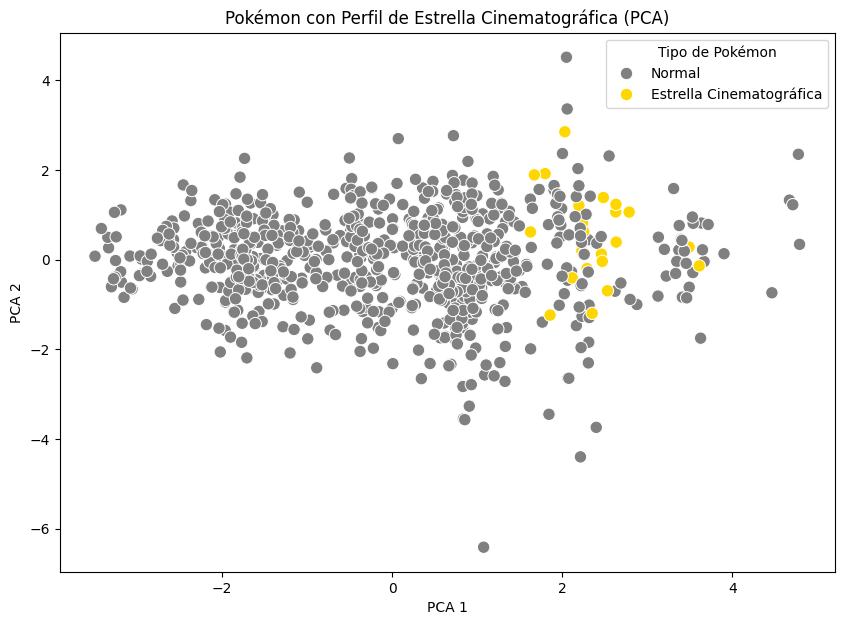

In [50]:
df['CustomCluster2'] = 'Normal'
df.loc[cine_df.index, 'CustomCluster2'] = 'Estrella Cinematográfica'

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df,
    x='PCA1', y='PCA2',
    hue='CustomCluster2',
    palette={'Normal': 'gray', 'Estrella Cinematográfica': 'gold'},
    s=80
)
plt.title("Pokémon con Perfil de Estrella Cinematográfica (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Tipo de Pokémon')
plt.show()


In [51]:
print("\n📊 Estadísticas promedio del cluster 'Estrella Cinematográfica':")
print(cine_df[stats_cols].mean().round(1))



📊 Estadísticas promedio del cluster 'Estrella Cinematográfica':
HP          84.6
Attack     115.8
Defense     91.8
Sp. Atk    121.4
Sp. Def     97.7
Speed       97.2
dtype: float64
